## Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import eda_helper_functions
from sklearn.ensemble import IsolationForest

## Read The Training Data

In [2]:
path = r"C:\Users\harsh\OneDrive\Documents\aws project folder\data\train.csv"
train = pd.read_csv(path)

In [3]:
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Indigo,2019-04-12,Banglore,Delhi,18:25:00,21:20:00,175,0.0,No Info,4990
1,Spicejet,2019-05-21,Banglore,Delhi,21:10:00,00:05:00,175,0.0,No check-in baggage included,3573
2,Jet Airways,2019-05-01,Kolkata,Banglore,16:30:00,23:35:00,425,1.0,No Info,14781
3,Indigo,2019-04-06,Banglore,Delhi,08:30:00,11:20:00,170,0.0,No Info,4823
4,Vistara,2019-06-06,Banglore,Delhi,11:30:00,14:20:00,170,0.0,No Info,4668
...,...,...,...,...,...,...,...,...,...,...
635,Jet Airways,2019-03-06,Banglore,New Delhi,07:00:00,18:25:00,685,1.0,No Info,16736
636,Air India,2019-06-06,Banglore,Delhi,10:00:00,12:45:00,165,0.0,No Info,6961
637,Jet Airways,2019-03-01,Banglore,New Delhi,14:05:00,09:30:00,1165,1.0,No Info,25735
638,Air India,2019-03-06,Delhi,Cochin,07:05:00,09:25:00,1580,2.0,No Info,9190


In [4]:
train.dtypes

airline             object
date_of_journey     object
source              object
destination         object
dep_time            object
arrival_time        object
duration             int64
total_stops        float64
additional_info     object
price                int64
dtype: object

In [5]:
train = train.assign(**{
    col: pd.to_datetime(train.loc[:, col], dayfirst=True, format="mixed")
    for col in ["date_of_journey", "dep_time", "arrival_time"]
})



In [6]:
train.dtypes

airline                    object
date_of_journey    datetime64[ns]
source                     object
destination                object
dep_time           datetime64[ns]
arrival_time       datetime64[ns]
duration                    int64
total_stops               float64
additional_info            object
price                       int64
dtype: object

## High level summary of data

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          640 non-null    object        
 1   date_of_journey  640 non-null    datetime64[ns]
 2   source           640 non-null    object        
 3   destination      640 non-null    object        
 4   dep_time         640 non-null    datetime64[ns]
 5   arrival_time     640 non-null    datetime64[ns]
 6   duration         640 non-null    int64         
 7   total_stops      640 non-null    float64       
 8   additional_info  640 non-null    object        
 9   price            640 non-null    int64         
dtypes: datetime64[ns](3), float64(1), int64(2), object(4)
memory usage: 50.1+ KB


In [8]:
train.describe(include="number")

,duration,total_stops,price
count,640.000000,640.000000,640.00000
mean,627.820312,0.776563,9227.35625
std,511.087451,0.663193,5302.15862
min,75.000000,0.000000,1759.00000
25%,170.000000,0.000000,5228.00000
50%,472.500000,1.000000,7981.50000
75%,936.250000,1.000000,12681.00000
max,2135.000000,3.000000,62427.00000


In [9]:
train.describe(include="O")

,airline,source,destination,additional_info
count,640,640,640,640
unique,8,5,6,4
top,Jet Airways,Delhi,Cochin,No Info
freq,224,249,249,518


In [10]:
(train.assign(total_stops=train["total_stops"].astype(object))
 .describe(include="O")
)

,airline,source,destination,total_stops,additional_info
count,640,640,640,640.0,640
unique,8,5,6,4.0,4
top,Jet Airways,Delhi,Cochin,1.0,No Info
freq,224,249,249,333.0,518


## High level analysis of missing values

In [11]:
eda_helper_functions.missing_info(train)

,count,percentage
variable,,


## high level analysis of Outliers

In [12]:
forest = IsolationForest(n_estimators=10,random_state=42)

In [13]:
(
train.assign(outlier=forest.fit_predict(train
                                        .drop(columns="price")
                                        .select_dtypes(include="number")))
                                        .query("outlier == -1")
    
)

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price,outlier
6,Jet Airways,2019-06-09,Banglore,Delhi,2024-07-11 08:20:00,2024-07-11 11:20:00,180,0.0,In-flight meal not included,7229,-1
8,Jet Airways,2019-06-01,Delhi,Cochin,2024-07-11 09:40:00,2024-07-11 04:25:00,1125,2.0,In-flight meal not included,10368,-1
11,Indigo,2019-06-27,Delhi,Cochin,2024-07-11 16:10:00,2024-07-11 22:30:00,380,1.0,No Info,6412,-1
12,Jet Airways,2019-06-12,Delhi,Cochin,2024-07-11 18:15:00,2024-07-11 19:00:00,1485,1.0,In-flight meal not included,10262,-1
14,Air India,2019-05-15,Delhi,Cochin,2024-07-11 10:55:00,2024-07-11 07:40:00,1245,2.0,No Info,12803,-1
...,...,...,...,...,...,...,...,...,...,...,...
629,Air India,2019-06-21,Chennai,Kolkata,2024-07-11 11:40:00,2024-07-11 13:55:00,135,0.0,No Info,4667,-1
634,Jet Airways,2019-06-27,Delhi,Cochin,2024-07-11 09:40:00,2024-07-11 12:35:00,1615,2.0,No Info,13014,-1
637,Jet Airways,2019-03-01,Banglore,New Delhi,2024-07-11 14:05:00,2024-07-11 09:30:00,1165,1.0,No Info,25735,-1
638,Air India,2019-03-06,Delhi,Cochin,2024-07-11 07:05:00,2024-07-11 09:25:00,1580,2.0,No Info,9190,-1


## pair plot

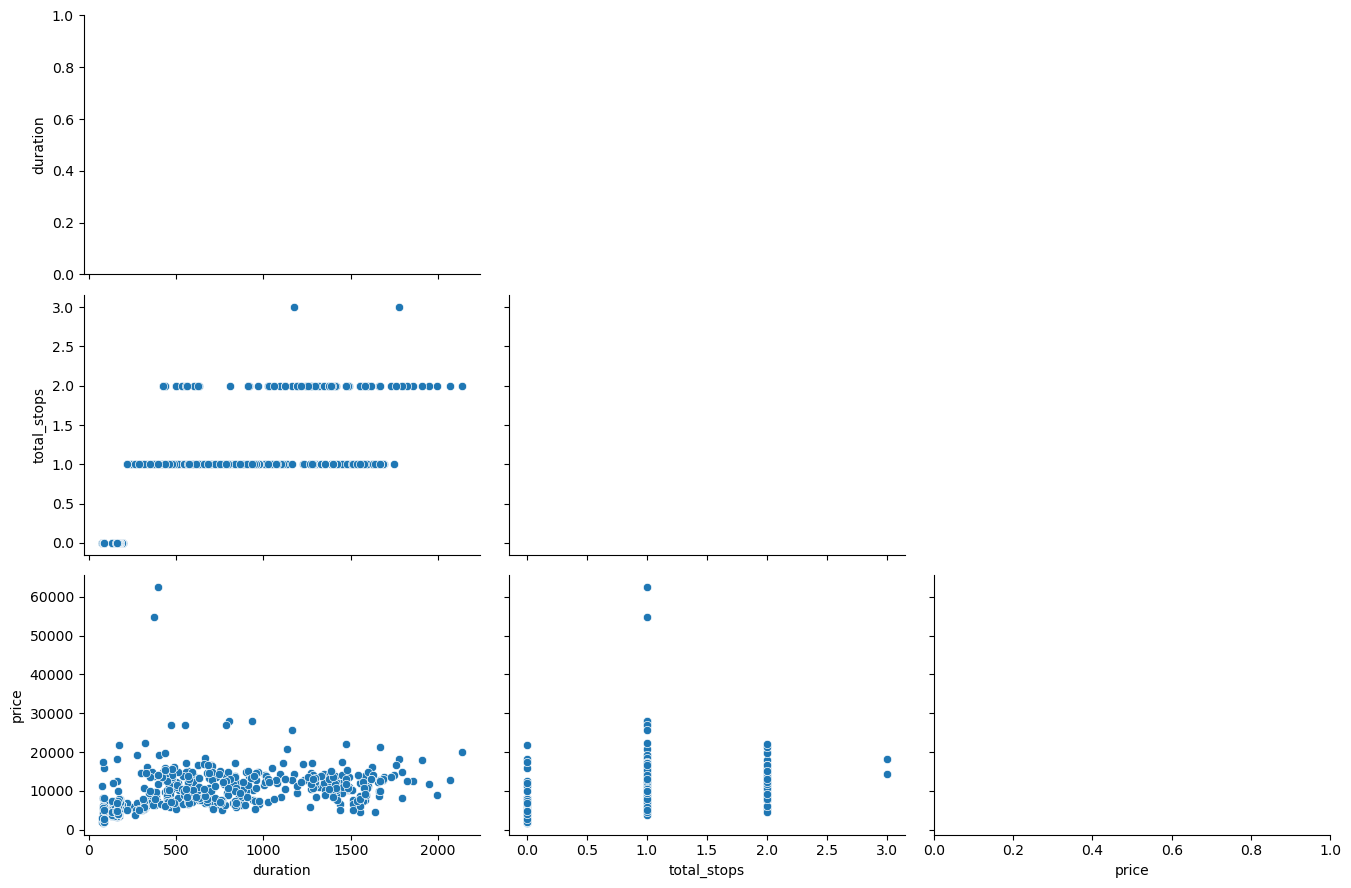

In [14]:
eda_helper_functions.pair_plots(train)

## correlation analysis

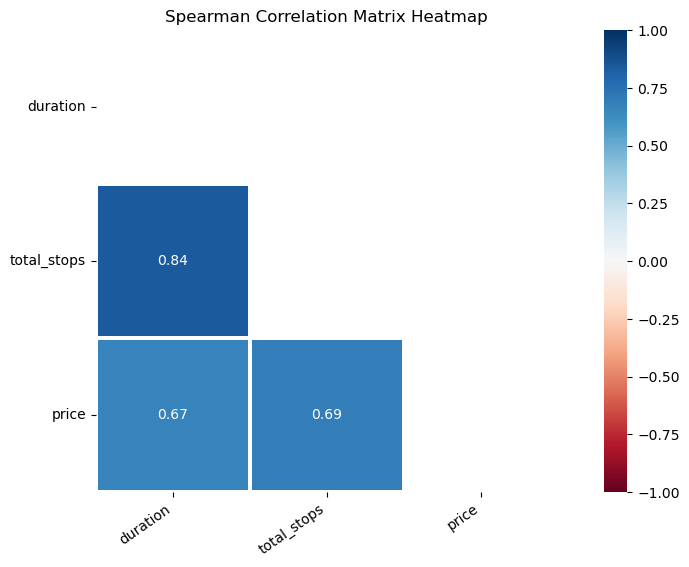

In [15]:
eda_helper_functions.correlation_heatmap(train)

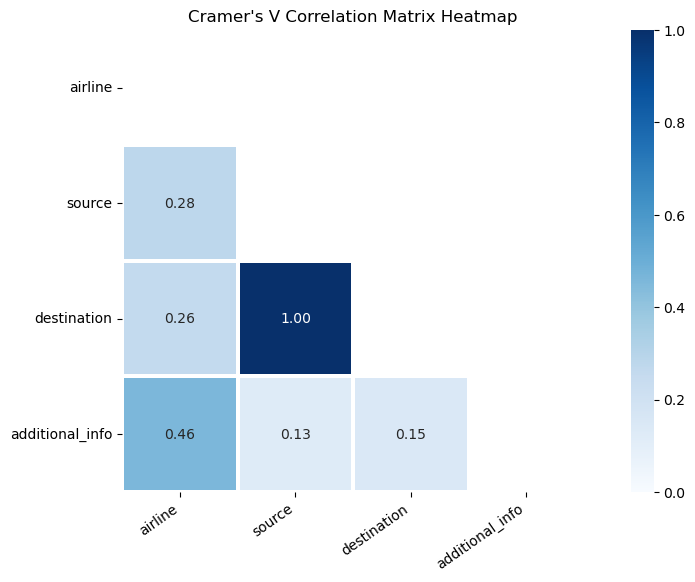

In [16]:
eda_helper_functions.cramersV_heatmap(train)

### Detailed analysis

In [17]:
train.columns

Index(['airline', 'date_of_journey', 'source', 'destination', 'dep_time',
       'arrival_time', 'duration', 'total_stops', 'additional_info', 'price'],
      dtype='object')

## 1. Airline

In [18]:
train.airline

0           Indigo
1         Spicejet
2      Jet Airways
3           Indigo
4          Vistara
          ...     
635    Jet Airways
636      Air India
637    Jet Airways
638      Air India
639        Vistara
Name: airline, Length: 640, dtype: object

In [19]:
eda_helper_functions.cat_summary(train,"airline")

0           Indigo
1         Spicejet
2      Jet Airways
3           Indigo
4          Vistara
          ...     
635    Jet Airways
636      Air India
637    Jet Airways
638      Air India
639        Vistara
Name: airline, Length: 640, dtype: object

Data Type      : object
Cardinality    : 8 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,
count,640
unique,8
top,Jet Airways
freq,224


,count,percentage
category,,
Jet Airways,224,0.350000
Indigo,117,0.182812
Air India,109,0.170313
Multiple Carriers,76,0.118750
Spicejet,52,0.081250
Vistara,29,0.045312
Air Asia,22,0.034375
Goair,11,0.017188


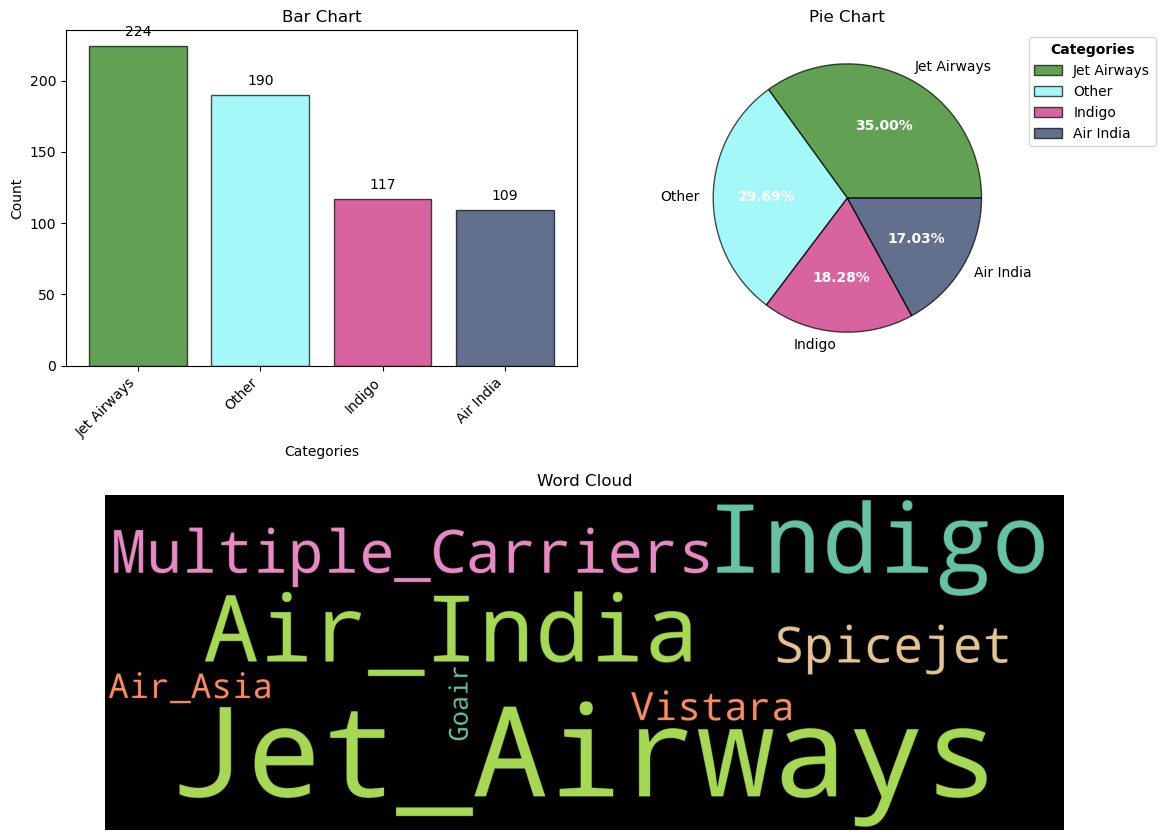

In [20]:
eda_helper_functions.cat_univar_plots(train,"airline",k=3)

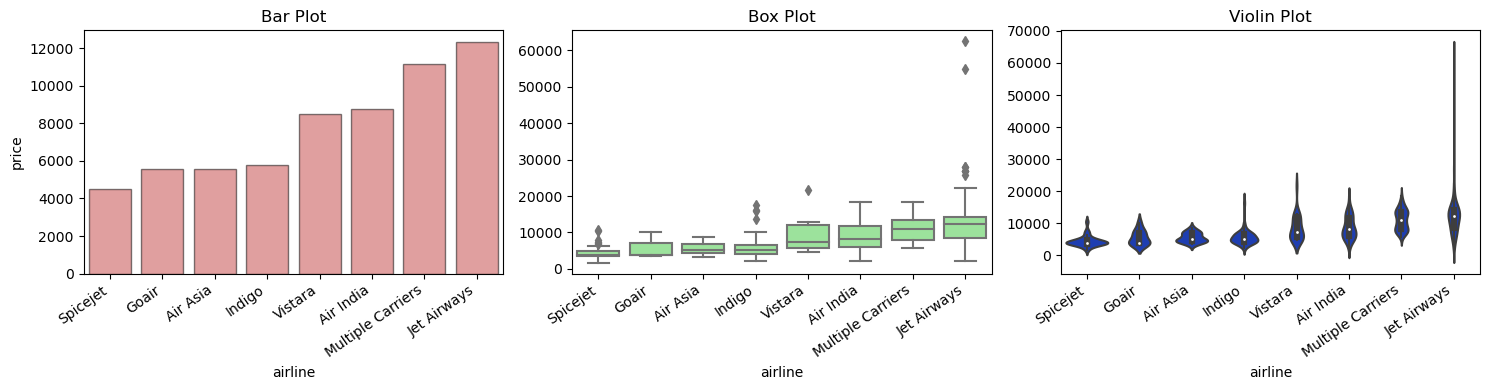

In [21]:
eda_helper_functions.num_cat_bivar_plots(data=train,num_var="price",cat_var="airline")

In [22]:
eda_helper_functions.num_cat_hyp_testing(train,"price","airline") 

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 39.63190424883633
- p-value              : 3.2277916134802516e-46
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 290.62129394979155
- p-value              : 6.0819045429791035e-59
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


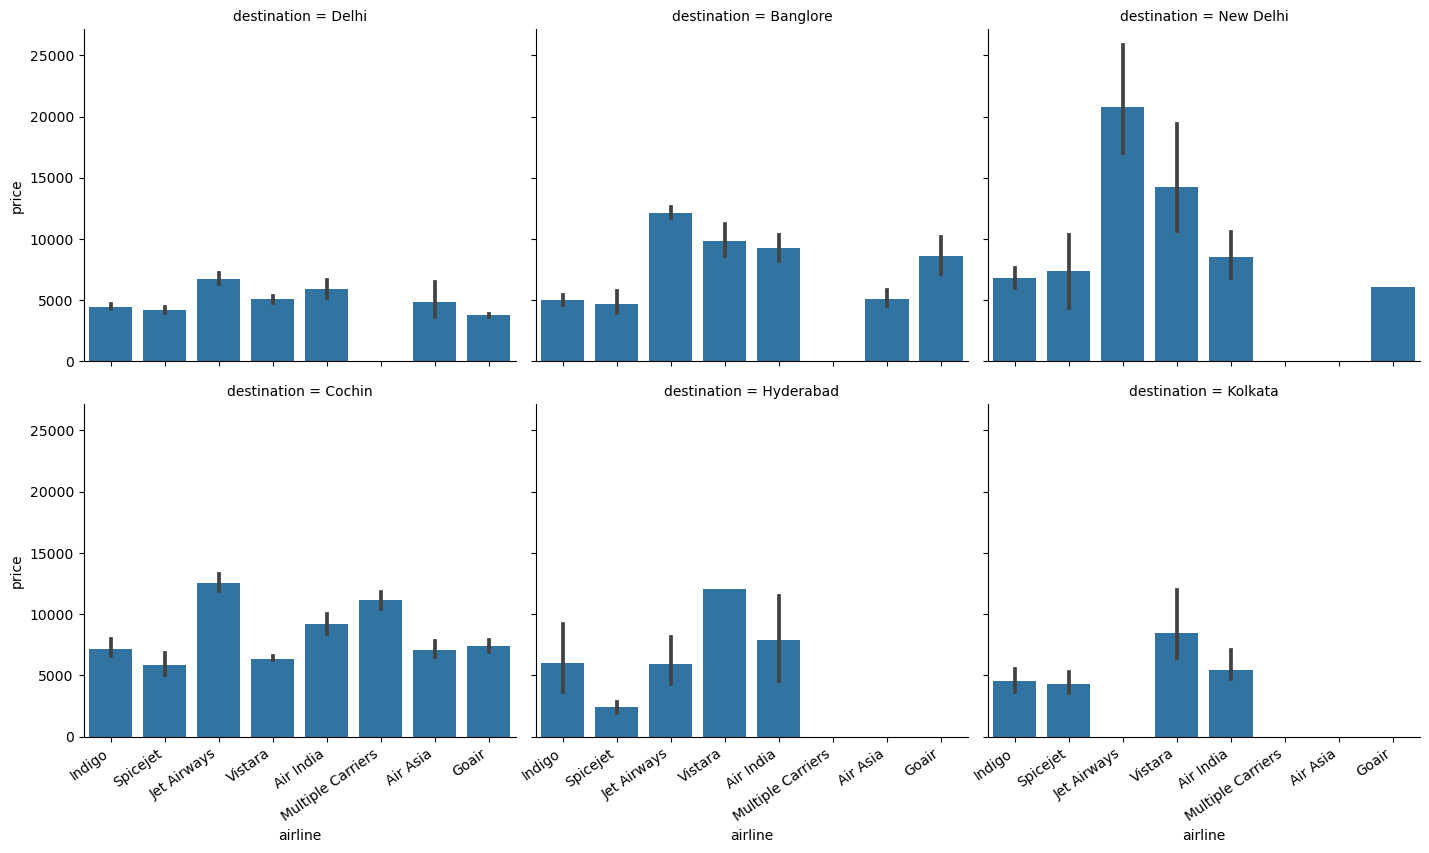

In [23]:
airline_grid = sns.FacetGrid(data=train,col='destination',height=4,aspect=1.2,col_wrap=3,sharey=True)

airline_grid.map(sns.barplot,"airline","price",order=train.airline.unique())

for ax in airline_grid.axes[3:]:
    eda_helper_functions.rotate_xlabels(ax)

## date_of_journey

In [24]:
train.date_of_journey

0     2019-04-12
1     2019-05-21
2     2019-05-01
3     2019-04-06
4     2019-06-06
         ...    
635   2019-03-06
636   2019-06-06
637   2019-03-01
638   2019-03-06
639   2019-03-09
Name: date_of_journey, Length: 640, dtype: datetime64[ns]

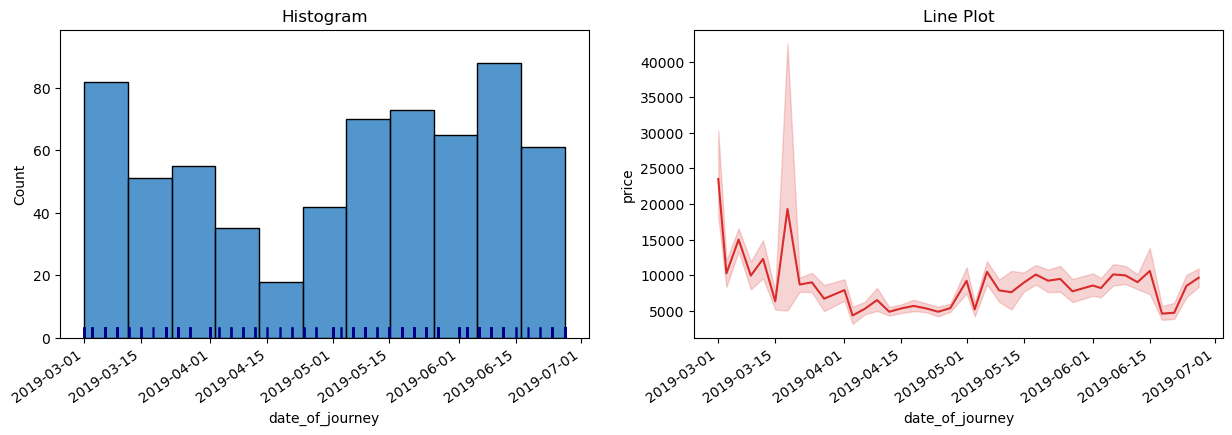

In [25]:
eda_helper_functions.dt_univar_plots(data=train,var="date_of_journey",target="price")



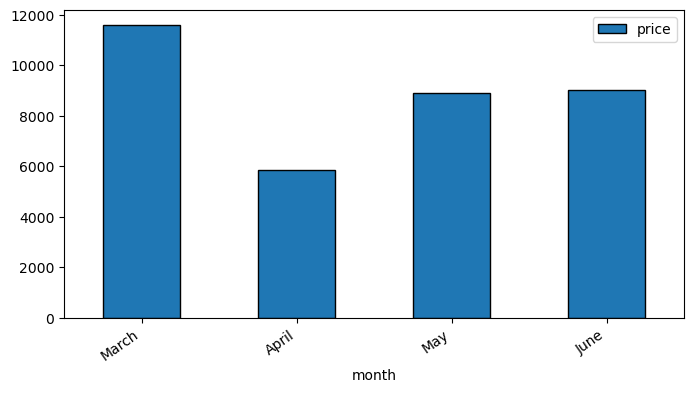

In [26]:
(
train.groupby(pd.Grouper(key="date_of_journey",freq="M"))
    .price.mean()
    .to_frame()
    .set_axis(["March","April","May","June"],axis=0)
    .rename_axis(index="month")
    .plot(kind='bar',figsize=(8,4),edgecolor="black")
)

ax = plt.gca()
eda_helper_functions.rotate_xlabels(ax)

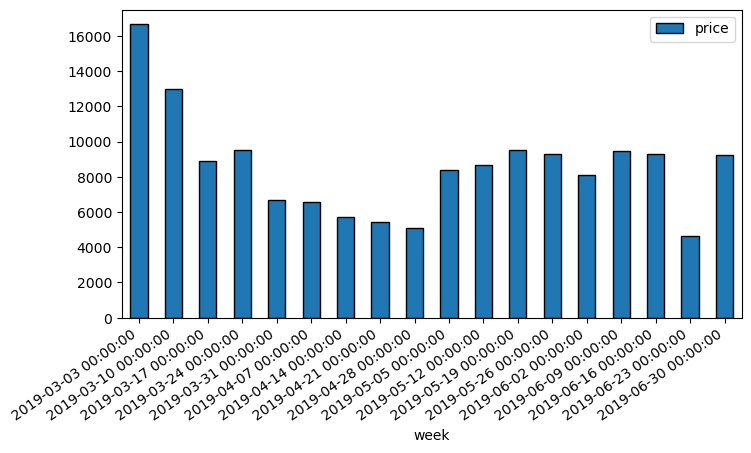

In [27]:
(
train.groupby(pd.Grouper(key="date_of_journey",freq="W"))
    .price.mean()
    .to_frame()
    .rename_axis(index="week")
    .plot(kind='bar',figsize=(8,4),edgecolor="black")
)

ax = plt.gca()
eda_helper_functions.rotate_xlabels(ax)

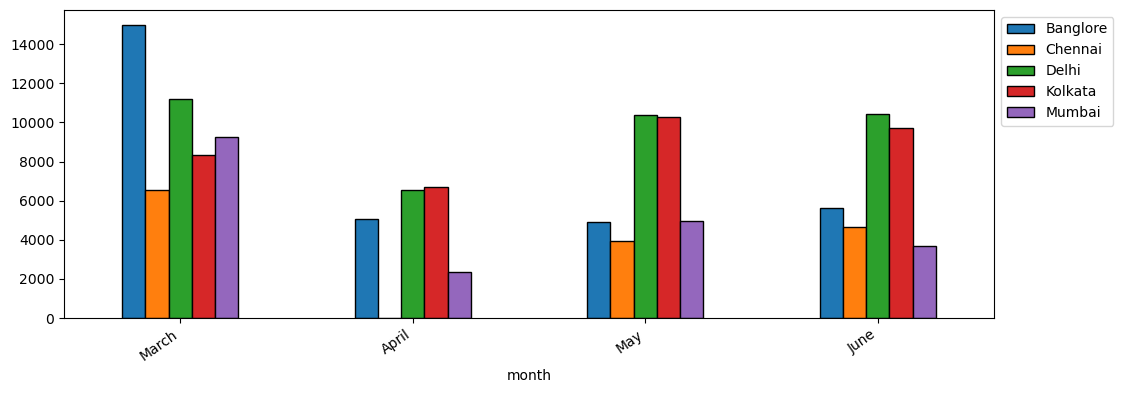

In [28]:
(
train.groupby([pd.Grouper(key="date_of_journey",freq="M"),"source"])
    .price.mean()
    .unstack(fill_value=0)
    .set_axis(["March","April","May","June"],axis=0)
    .rename_axis(index="month")
    .plot(kind='bar',figsize=(12,4),edgecolor="black")
)

ax=plt.gca()
ax.legend(loc="upper left",bbox_to_anchor=(1,1))


eda_helper_functions.rotate_xlabels(ax)

### dep_time

In [29]:
train.dep_time

0     2024-07-11 18:25:00
1     2024-07-11 21:10:00
2     2024-07-11 16:30:00
3     2024-07-11 08:30:00
4     2024-07-11 11:30:00
              ...        
635   2024-07-11 07:00:00
636   2024-07-11 10:00:00
637   2024-07-11 14:05:00
638   2024-07-11 07:05:00
639   2024-07-11 06:40:00
Name: dep_time, Length: 640, dtype: datetime64[ns]

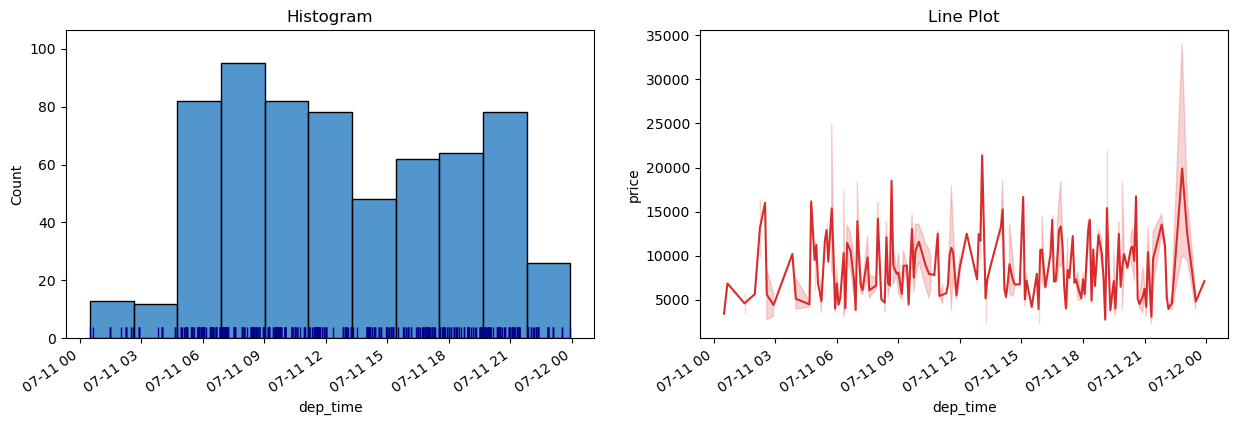

In [30]:
eda_helper_functions.dt_univar_plots(train,"dep_time","price")

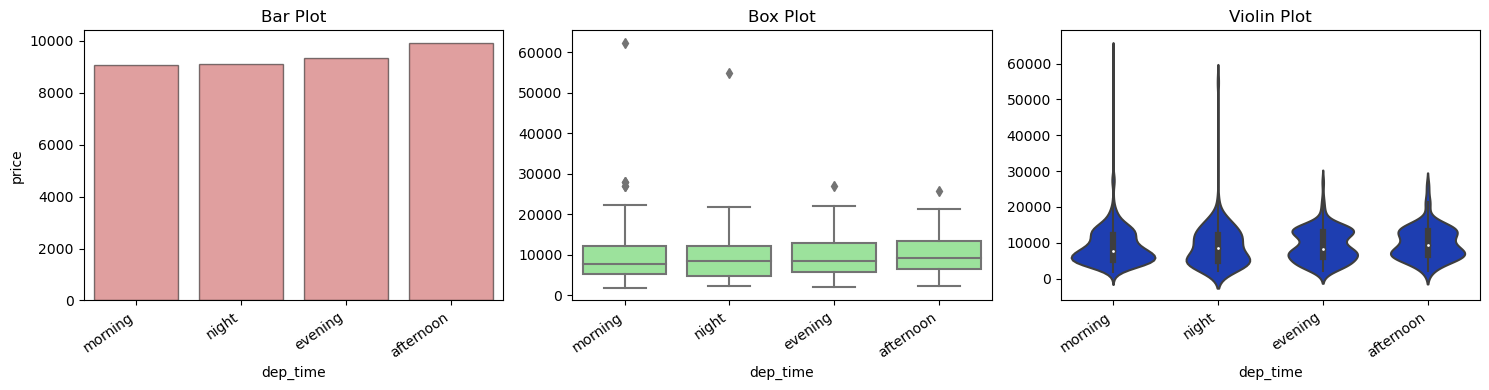

In [41]:
(
    train.assign(dep_time=lambda df_:( np.select([df_.dep_time.dt.hour.between(4,12,inclusive="left"),
                                    df_.dep_time.dt.hour.between(12,16,inclusive="left"),
                                    df_.dep_time.dt.hour.between(16,20,inclusive="left")],
                                    ["morning","afternoon","evening"],default="night")
    
))
    .pipe(eda_helper_functions.num_cat_bivar_plots,"price","dep_time")
)

### Duration

In [43]:
eda_helper_functions.num_summary(train,"duration")

0       175
1       175
2       425
3       170
4       170
       ... 
635     685
636     165
637    1165
638    1580
639    1665
Name: duration, Length: 640, dtype: int64

Data Type      : int64
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,value
percentile,
0,75.00
5,90.00
10,140.00
25,170.00
50,472.50
75,936.25
90,1475.50
95,1590.25
99,1810.25


,value
mean,627.820312
trimmed mean (5%),596.406250
trimmed mean (10%),567.187500
median,472.500000


,value
var,261210.382372
std,511.087451
IQR,766.250000
mad,312.500000
coef_variance,0.814066


,value
skewness,0.826571
kurtosis,-0.516564


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 1.5849837483911262e-22
Test Statistic       : 0.8715286254882812
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.782
Test Statistic       : 29.117713867099837
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


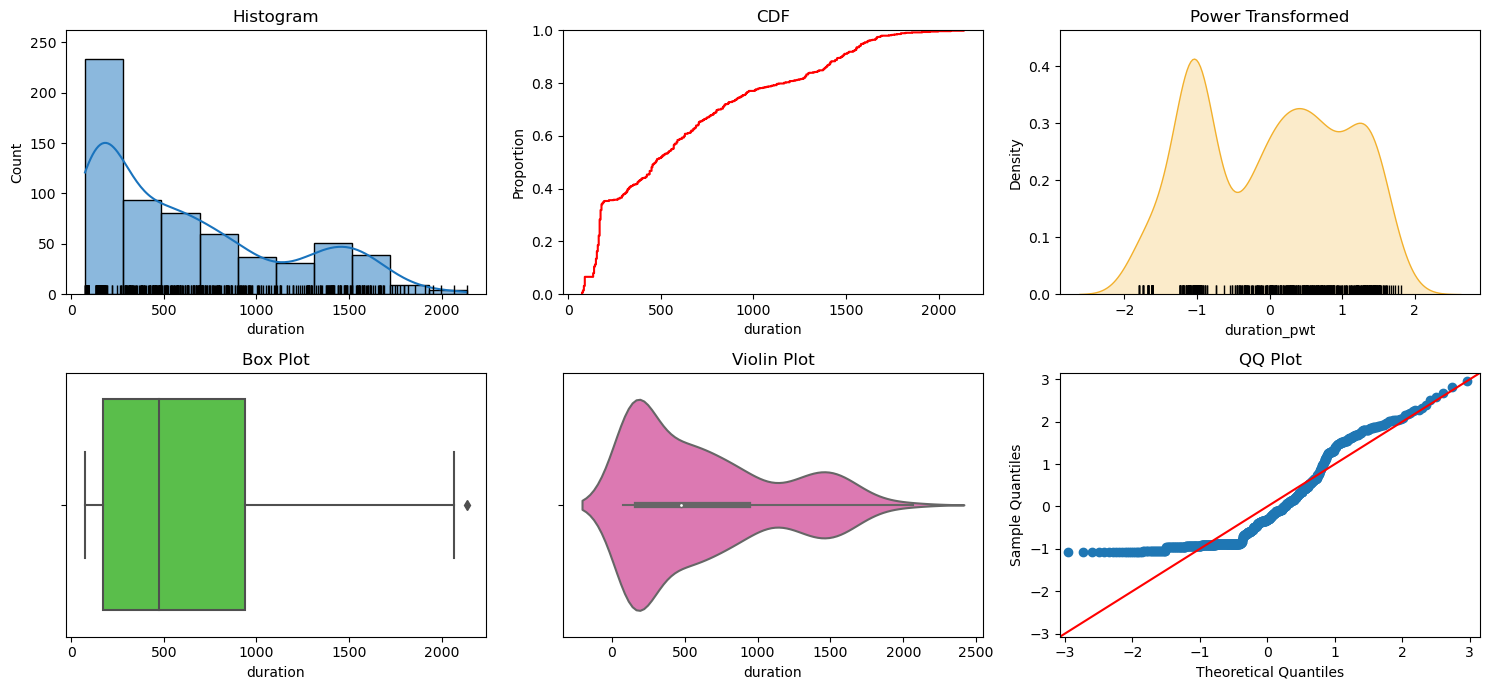

In [44]:
eda_helper_functions.num_univar_plots(train,"duration")

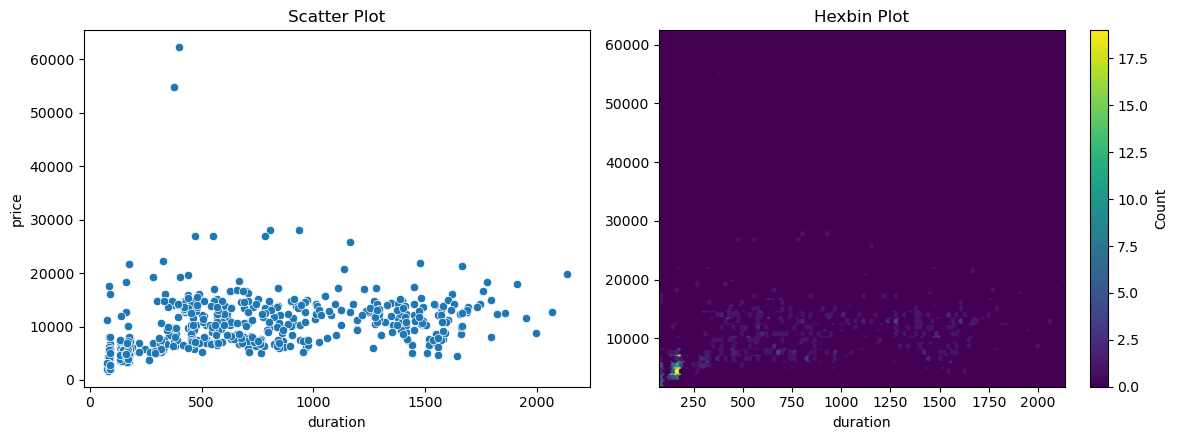

In [46]:
eda_helper_functions.num_bivar_plots(train,"duration","price")

In [47]:
eda_helper_functions.num_num_hyp_testing(train,"price","duration")

- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.42622583335775804
- p-value              : 1.2335541776419726e-29
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.6680259840345771
- p-value              : 6.146537583507657e-84
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


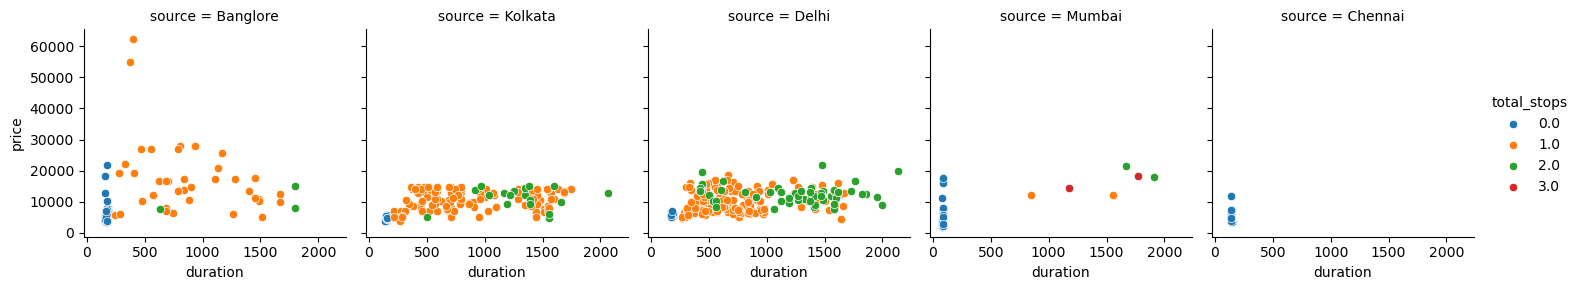

In [54]:
duration_grid = sns.FacetGrid(data=train,
                             col="source",hue="total_stops",sharey=True)

duration_grid.map(sns.scatterplot,"duration","price")

duration_grid.add_legend()

### Automated EDA

In [58]:
from ydata_profiling import ProfileReport 

In [59]:
report = ProfileReport(train)

In [60]:
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]